## sklearn
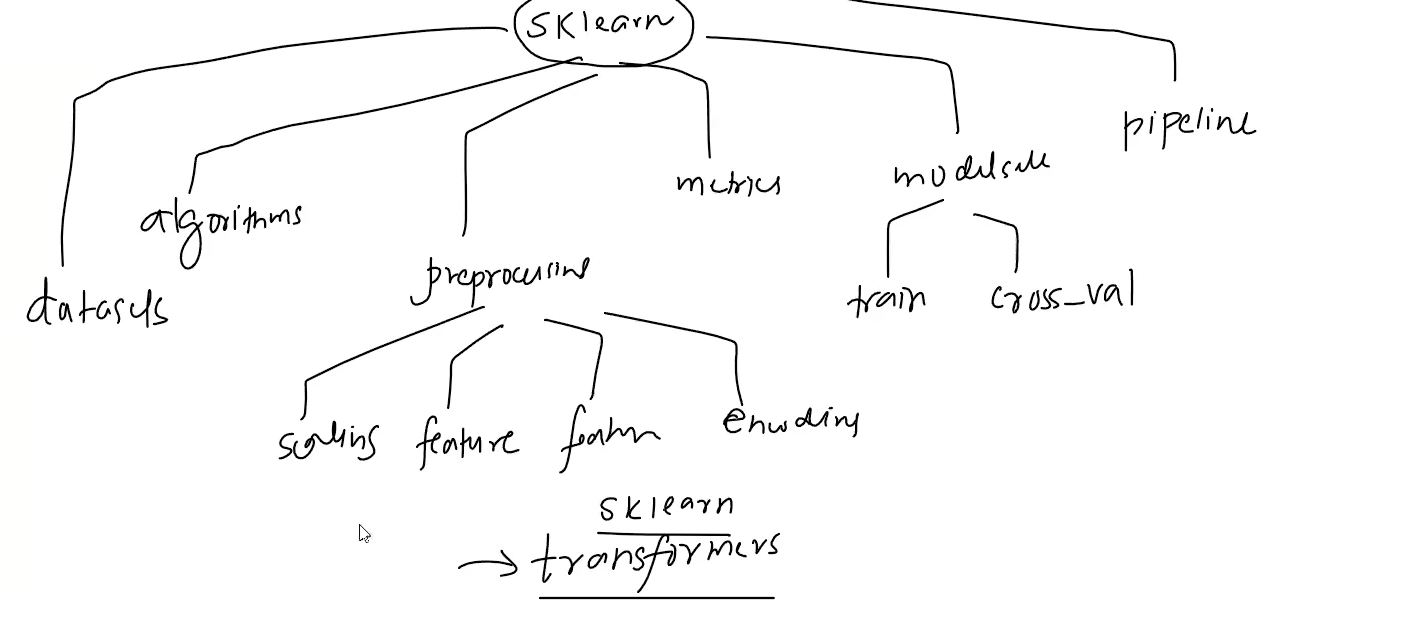

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [18]:
df = pd.read_csv('cars.csv')

In [19]:
df.sample(3)

,brand,km_driven,fuel,owner,selling_price
1974,Honda,100000,Petrol,Second Owner,540000
5920,Maruti,70000,Diesel,Third Owner,380000
6636,Hyundai,30000,Petrol,Second Owner,563000


In [20]:
df['owner'].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
                                                      df.drop(columns=['selling_price']),
                                                      df['selling_price'],
                                                      test_size=0.2,
                                                      random_state=42
                                                    )

In [22]:
X_train.head()

,brand,km_driven,fuel,owner
6518,Tata,2560,Petrol,First Owner
6144,Honda,80000,Petrol,Second Owner
6381,Hyundai,150000,Diesel,Fourth & Above Owner
438,Maruti,120000,Diesel,Second Owner
5939,Maruti,25000,Petrol,First Owner


### The hard way

In [23]:
# apply ordinal encoding to owner
oe = OrdinalEncoder(categories=[['Test Drive Car', 'Fourth & Above Owner', 'Third Owner', 'Second Owner', 'First Owner']])

X_train_owner = oe.fit_transform(X_train.loc[:,['owner']])
X_test_owner = oe.transform(X_test.loc[:,['owner']])

In [24]:
# convert to df
X_train_owner_df = pd.DataFrame(X_train_owner,columns=oe.get_feature_names_out())
X_test_owner_df = pd.DataFrame(X_test_owner,columns=oe.get_feature_names_out())

In [25]:
X_train_owner_df.head()

,owner
0,4.0
1,3.0
2,1.0
3,3.0
4,4.0


In [26]:
# apply ohe to brand and fuel
ohe = OneHotEncoder(sparse_output=False)

X_train_brand_fuel = ohe.fit_transform(X_train[['brand','fuel']]) # These 2 are the only nominal categorical column
X_test_brand_fuel = ohe.transform(X_test[['brand','fuel']])

In [27]:
# converting to dataframe
X_train_brand_fuel_df = pd.DataFrame(X_train_brand_fuel, columns=ohe.get_feature_names_out())
X_test_brand_fuel_df = pd.DataFrame(X_test_brand_fuel, columns=ohe.get_feature_names_out())

In [28]:
X_train_brand_fuel_df.head()

,brand_Ambassador,brand_Ashok,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,brand_Ford,...,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
X_train.head()

,brand,km_driven,fuel,owner
6518,Tata,2560,Petrol,First Owner
6144,Honda,80000,Petrol,Second Owner
6381,Hyundai,150000,Diesel,Fourth & Above Owner
438,Maruti,120000,Diesel,Second Owner
5939,Maruti,25000,Petrol,First Owner


In [30]:
X_train_rem = X_train.drop(columns=['brand','fuel','owner'],inplace=True)
X_test_rem = X_test.drop(columns=['brand','fuel','owner'],inplace=True)

In [31]:
X_train = pd.concat([X_train_rem, X_train_owner_df, X_train_brand_fuel_df],axis=1)
X_test = pd.concat([X_test_rem, X_test_owner_df, X_test_brand_fuel_df],axis=1)

In [32]:
X_train.head()

,owner,brand_Ambassador,brand_Ashok,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,...,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### The easy way

In [33]:
from sklearn.compose import ColumnTransformer

#### Column Transformer
- The ColumnTransformer is a class within the scikit-learn Python library designed for applying different data preprocessing transformations to specific columns of a dataset. This is particularly useful when dealing with heterogeneous data, where different types of features (e.g., numerical, categorical).

In [34]:
df = pd.read_csv('cars.csv')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
                                                      df.drop(columns=['selling_price']),
                                                      df['selling_price'],
                                                      test_size=0.2,
                                                      random_state=42
                                                    )

In [37]:
X_train.head()
#ohe in brand, fuel and OrdinalEncoder in owner

,brand,km_driven,fuel,owner
6518,Tata,2560,Petrol,First Owner
6144,Honda,80000,Petrol,Second Owner
6381,Hyundai,150000,Diesel,Fourth & Above Owner
438,Maruti,120000,Diesel,Second Owner
5939,Maruti,25000,Petrol,First Owner


In [ ]:
# Syntax
"""tranformer = ColumnTransformer(
    [
        {"name1", object,[Col1,col2],
         {},
         {}}
    ]
)"""

In [38]:
transformer = ColumnTransformer(
    [
        ("ordinal", OrdinalEncoder(categories=[['Test Drive Car', 'Fourth & Above Owner', 'Third Owner', 'Second Owner', 'First Owner']]), ['owner']),
        ("onehot", OneHotEncoder(sparse_output=False), ['brand', 'fuel'])
    ],
    remainder='passthrough'
)

# setting to get a pandas df
transformer.set_output(transform='pandas')
# remainder ='passthrough' means no change in the other columns are req

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal',
                                 OrdinalEncoder(categories=[['Test Drive Car',
                                                             'Fourth & Above '
                                                             'Owner',
                                                             'Third Owner',
                                                             'Second Owner',
                                                             'First Owner']]),
                                 ['owner']),
                                ('onehot', OneHotEncoder(sparse_output=False),
                                 ['brand', 'fuel'])])

In [39]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [42]:
transformer.named_transformers_['onehot'].categories_

[array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
        'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
        'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
        'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
        'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
        'Volvo'], dtype=object),
 array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object)]

## Custom Estimator

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
from sklearn.utils import check_X_y


In [45]:
class MostFrequentClassClassifier(BaseEstimator, ClassifierMixin):
    """ adding 3 method
    1. Add constructor
    2. fit method (BaseEstimator make sure that fit  method is present)
    3. predict which takes test data
    """
    def __init__(self):
        self.most_frequent_ = None

    def fit(self, X, y):

        # Validate input X and target vector y
        X, y = check_X_y(X, y)

        # Ensure y is 1D
        y = np.ravel(y)

        # Manually compute the most frequent class
        unique_classes, counts = np.unique(y, return_counts=True)
        self.most_frequent_ = unique_classes[np.argmax(counts)]

        return self

    def predict(self, X):
        if self.most_frequent_ is None:
            raise ValueError("This classifier instance is not fitted yet.")
        # Predict the most frequent class for each input sample
        return np.full(shape=(X.shape[0],), fill_value=self.most_frequent_)


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize and fit the custom estimator
classifier = MostFrequentClassClassifier()
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Evaluate the custom estimator
print(f"Predicted class for all test instances: {predictions[0]}")


Predicted class for all test instances: 1


In [48]:
classifier.most_frequent_

np.int64(1)

In [49]:
from sklearn.model_selection import cross_val_score

cross_val_score(classifier, X_train, y_train)

array([0.34782609, 0.26086957, 0.27272727, 0.18181818, 0.31818182])

### Scoring Function
- Update in above code

In [50]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
import numpy as np

class MostFrequentClassClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.most_frequent_ = None

    def fit(self, X, y):
        # Ensure y is 1D
        y = np.ravel(y)

        # Compute the most frequent class
        unique_classes, counts = np.unique(y, return_counts=True)
        self.most_frequent_ = unique_classes[np.argmax(counts)]
        return self

    def predict(self, X):
        if self.most_frequent_ is None:
            raise ValueError("This classifier instance is not fitted yet.")
        # Predict the most frequent class for each input sample
        return np.full(shape=(X.shape[0],), fill_value=self.most_frequent_)

    def score(self, X, y):
        """Return the mean accuracy on the given test data and labels."""
        # Ensure y is 1D
        y = np.ravel(y)

        # Generate predictions
        predictions = self.predict(X)

        # Calculate and return the accuracy
        return accuracy_score(y, predictions)


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load a dataset
iris = load_iris()
X, y = iris.data, iris.target

# Simplify to a binary classification problem
is_class_0_or_1 = y < 2
X_bin = X[is_class_0_or_1]
y_bin = y[is_class_0_or_1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

# Initialize and fit the custom classifier
classifier = MostFrequentClassClassifier()
classifier.fit(X_train, y_train)

# Evaluate the classifier using the score method
score = classifier.score(X_test, y_test)
print(f"Accuracy of the MostFrequentClassClassifier: {score}")


Accuracy of the MostFrequentClassClassifier: 0.4


## Transformer

In [1]:
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Generate some data
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)

# Use the transformer directly
X_transformed = StandardScaler().fit_transform(X)


LinearRegression().fit(X_transformed, y)


LinearRegression()

#### Custom transformer using Function transformer

In [2]:
import numpy as np

def cube(x):

    return np.power(x,3)


In [3]:
from sklearn.preprocessing import FunctionTransformer

# Create the custom transformer
cube_transformer = FunctionTransformer(cube)


In [4]:
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Generate some data
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)

# Use the transformer directly
X_transformed = cube_transformer.transform(X)

LinearRegression().fit(X_transformed, y)


LinearRegression()

#### Custom Transformer Using BaseEstimator and TransformerMixin

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

In [6]:
class MedianIQRScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.medians_ = None
        self.iqr_ = None

    def fit(self, X, y=None):
        # Calculate medians and interquartile range for each feature
        self.medians_ = np.median(X, axis=0)
        Q1 = np.percentile(X, 25, axis=0)
        Q3 = np.percentile(X, 75, axis=0)
        self.iqr_ = Q3 - Q1

        # Handle case where IQR is 0 to avoid division by zero during transform
        self.iqr_[self.iqr_ == 0] = 1
        return self

    def transform(self, X):
        # Check if fit has been called
        if self.medians_ is None or self.iqr_ is None:
            raise RuntimeError("The transformer has not been fitted yet.")

        # Scale features using median and IQR learned during fit
        return (X - self.medians_) / self.iqr_


In [7]:
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=100, n_features=2, centers=3, random_state=42)

# Initialize the transformer
scaler = MedianIQRScaler()

# Fit the scaler to the data
scaler.fit(X)

# Transform the data
X_scaled = scaler.transform(X)

# Check the first few rows of the transformed data
print("Transformed data (first 5 rows):")
print(X_scaled[:5])


Transformed data (first 5 rows):
[[-0.49872679 -0.71613207]
 [ 0.78423675 -0.08192868]
 [-0.03656645  0.52987512]
 [ 0.84159877 -0.09379661]
 [-0.3814692  -0.57206564]]


#### Column Transformer

In [8]:
import pandas as pd

# Define the data with numeric labels for sentiment
data = {
    "Social Media Platform": ["Twitter", "Facebook", "Instagram", "Twitter", "Facebook",
                              "Instagram", "Twitter", "Facebook", "Instagram", "Twitter"],
    "Review": ["Love the new update!", "Too many ads now", "Great for sharing photos",
               "Newsfeed algorithm is biased", "Privacy concerns with latest update",
               "Amazing filters!", "Too much spam", "Easy to connect with friends",
               "Stories feature is fantastic", "Customer support lacking"],
    "age": [21, 19, np.nan, 17, 24, np.nan, 30, 19, 16, 31],
    "Sentiment": [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]  # Numeric labels: 1 for Positive, 0 for Negative
}

# Create a DataFrame
df = pd.DataFrame(data)

print(df)

  Social Media Platform                               Review   age  Sentiment
0               Twitter                 Love the new update!  21.0          1
1              Facebook                     Too many ads now  19.0          0
2             Instagram             Great for sharing photos   NaN          1
3               Twitter         Newsfeed algorithm is biased  17.0          0
4              Facebook  Privacy concerns with latest update  24.0          0
5             Instagram                     Amazing filters!   NaN          1
6               Twitter                        Too much spam  30.0          0
7              Facebook         Easy to connect with friends  19.0          1
8             Instagram         Stories feature is fantastic  16.0          1
9               Twitter             Customer support lacking  31.0          0


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [10]:
# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('platform_ohe', OneHotEncoder(), ['Social Media Platform']),
        ('review_bow', CountVectorizer(), 'Review'),
        ('age_impute', SimpleImputer(),['age'])
    ],
    remainder='drop'  # Drop other columns not specified in transformers
)

In [11]:
pd.DataFrame(column_transformer.fit_transform(df).toarray(),columns=column_transformer.get_feature_names_out())

,platform_ohe__Social Media Platform_Facebook,platform_ohe__Social Media Platform_Instagram,platform_ohe__Social Media Platform_Twitter,review_bow__ads,review_bow__algorithm,review_bow__amazing,review_bow__biased,review_bow__concerns,review_bow__connect,review_bow__customer,...,review_bow__sharing,review_bow__spam,review_bow__stories,review_bow__support,review_bow__the,review_bow__to,review_bow__too,review_bow__update,review_bow__with,age_impute__age
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,21.000
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19.000
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.125
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.000
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,24.000
5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.125
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.000
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,19.000
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16.000
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,31.000


### Feature Union

In [12]:
import pandas as pd
import numpy as np

# Generating a random dataset with 10 rows and 4 columns
np.random.seed(42)  # For reproducibility
data = np.random.randn(10, 4)

# Creating a DataFrame and naming the columns
df = pd.DataFrame(data, columns=['f1', 'f2', 'f3', 'y'])

df

,f1,f2,f3,y
0,0.496714,-0.138264,0.647689,1.523030
1,-0.234153,-0.234137,1.579213,0.767435
2,-0.469474,0.542560,-0.463418,-0.465730
3,0.241962,-1.913280,-1.724918,-0.562288
4,-1.012831,0.314247,-0.908024,-1.412304
5,1.465649,-0.225776,0.067528,-1.424748
6,-0.544383,0.110923,-1.150994,0.375698
7,-0.600639,-0.291694,-0.601707,1.852278
8,-0.013497,-1.057711,0.822545,-1.220844
9,0.208864,-1.959670,-1.328186,0.196861


In [13]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA

In [14]:
# Define FeatureUnion
feature_union = FeatureUnion([
    ('scaler', StandardScaler()),  # Apply StandardScaler
    ('pca', PCA(n_components=2))   # Apply PCA, reduce to 2 components
])

In [15]:
X_transformed = feature_union.fit_transform(df.drop(columns=['y']))

pd.DataFrame(X_transformed, columns=feature_union.get_feature_names_out())

,scaler__f1,scaler__f2,scaler__f3,pca__pca0,pca__pca1
0,0.815293,0.418360,0.947878,1.025659,-0.425413
1,-0.282292,0.302777,1.873701,1.772532,-0.358223
2,-0.635686,1.239158,-0.156427,0.327888,1.038742
3,0.432718,-1.721587,-1.410206,-1.911072,-0.689960
4,-1.451676,0.963905,-0.598312,-0.193153,1.371662
5,2.270396,0.312856,0.371269,0.511760,-0.891133
6,-0.748180,0.718778,-0.839795,-0.484280,1.020731
7,-0.832663,0.233387,-0.293870,-0.191723,0.583958
8,0.049080,-0.690119,1.121664,0.726878,-0.811461
9,0.383011,-1.777515,-1.015903,-1.584488,-0.838903


### Pipeline

In [16]:
import pandas as pd
import numpy as np

# Generating a random dataset with 10 rows and 4 columns
np.random.seed(42)  # For reproducibility
data = np.random.randn(10, 4)

# Creating a DataFrame and naming the columns
df = pd.DataFrame(data, columns=['f1', 'f2', 'f3', 'y'])

df

,f1,f2,f3,y
0,0.496714,-0.138264,0.647689,1.523030
1,-0.234153,-0.234137,1.579213,0.767435
2,-0.469474,0.542560,-0.463418,-0.465730
3,0.241962,-1.913280,-1.724918,-0.562288
4,-1.012831,0.314247,-0.908024,-1.412304
5,1.465649,-0.225776,0.067528,-1.424748
6,-0.544383,0.110923,-1.150994,0.375698
7,-0.600639,-0.291694,-0.601707,1.852278
8,-0.013497,-1.057711,0.822545,-1.220844
9,0.208864,-1.959670,-1.328186,0.196861


In [17]:
from sklearn.pipeline import Pipeline

In [18]:
# Define FeatureUnion
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Apply StandardScaler
    ('pca', PCA(n_components=2))
])

In [19]:
pd.DataFrame(pipeline.fit_transform(X), columns=pipeline.get_feature_names_out())

,pca0,pca1
0,-1.967289,-0.189197
1,0.980541,-1.140597
2,0.696192,1.069669
3,1.049030,-1.246446
4,-1.562347,-0.140628
...,...,...
95,0.673056,1.107907
96,0.960615,0.890179
97,1.014953,-0.817791
98,-1.401202,-0.194052
